3.Import the required packages with their customary aliases as follows:
    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`


In [203]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [205]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [207]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [209]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [211]:
# 5. How many rows and columns are in `gdp_df`? What are the data types of each column?
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [213]:
gdp_df.describe()

,Year,Value,Value Footnotes
count,8219.000000,8219.000000,0.0
mean,2006.672345,20270.976242,NaN
std,9.782986,22532.004246,NaN
min,1990.000000,510.822823,NaN
25%,1998.000000,4284.868430,NaN
50%,2007.000000,11916.457927,NaN
75%,2015.000000,28543.305542,NaN
max,2023.000000,174339.077325,NaN


In [215]:
# 6. Drop the `Value Footnotes` column 
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

In [217]:
#  rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'
gdp_df = gdp_df.rename(columns={"Country or Area": "Country", "Value": "GDP_Per_Capita"})
print(gdp_df.describe())

              Year  GDP_Per_Capita
count  8219.000000     8219.000000
mean   2006.672345    20270.976242
std       9.782986    22532.004246
min    1990.000000      510.822823
25%    1998.000000     4284.868430
50%    2007.000000    11916.457927
75%    2015.000000    28543.305542
max    2023.000000   174339.077325


In [219]:
# 7. How many countries have data for all years? 
total_years = gdp_df['Year'].nunique()
print(f"Total unique years in the dataset: {total_years}")

Total unique years in the dataset: 34


In [221]:
country_year_counts = gdp_df.groupby(['Country','Year']).count()
print(country_year_counts)

                  GDP_Per_Capita
Country     Year                
Afghanistan 2000               1
            2001               1
            2002               1
            2003               1
            2004               1
...                          ...
Zimbabwe    2019               1
            2020               1
            2021               1
            2022               1
            2023               1

[8219 rows x 1 columns]


In [223]:
countries_with_all_years = country_year_counts[country_year_counts == total_years]

In [225]:
countries_with_all_years

GDP_Per_Capita
Country     Year                
Afghanistan 2000             NaN
            2001             NaN
            2002             NaN
            2003             NaN
            2004             NaN
...                          ...
Zimbabwe    2019             NaN
            2020             NaN
            2021             NaN
            2022             NaN
            2023             NaN

[8219 rows x 1 columns]

In [227]:
number_of_countries = len(countries_with_all_years)
print(number_of_countries)

8219


In [229]:
# Which countries are missing many years of data? Look at the number of observations per year. What do you notice?
print(countries_with_all_years.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8219 entries, ('Afghanistan', 2000) to ('Zimbabwe', 2023)
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GDP_Per_Capita  0 non-null      float64
dtypes: float64(1)
memory usage: 90.6+ KB
None


In [231]:
country_year_counts = gdp_df.groupby(['Country','Year']).count()
print(country_year_counts.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8219 entries, ('Afghanistan', 2000) to ('Zimbabwe', 2023)
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   GDP_Per_Capita  8219 non-null   int64
dtypes: int64(1)
memory usage: 90.6+ KB
None


In [233]:
 gdp_df[gdp_df["Year"] == 2020]["GDP_Per_Capita"]

3        2769.685745
27       3861.111238
61       4622.731427
95      14650.395929
129     14194.155748
            ...     
8068    45055.782930
8090     5423.682547
8120    18600.986362
8154     3391.595412
8188     2987.269823
Name: GDP_Per_Capita, Length: 247, dtype: float64

In [235]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [237]:
# 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. 
rows2020 = gdp_df["Year"] == 2020
gdp_distribution = gdp_df[rows2020]
gdp_distribution

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


In [239]:
gdp_distribution = gdp_distribution["GDP_Per_Capita"]
gdp_distribution

3        2769.685745
27       3861.111238
61       4622.731427
95      14650.395929
129     14194.155748
            ...     
8068    45055.782930
8090     5423.682547
8120    18600.986362
8154     3391.595412
8188     2987.269823
Name: GDP_Per_Capita, Length: 247, dtype: float64

Text(0, 0.5, 'Count')

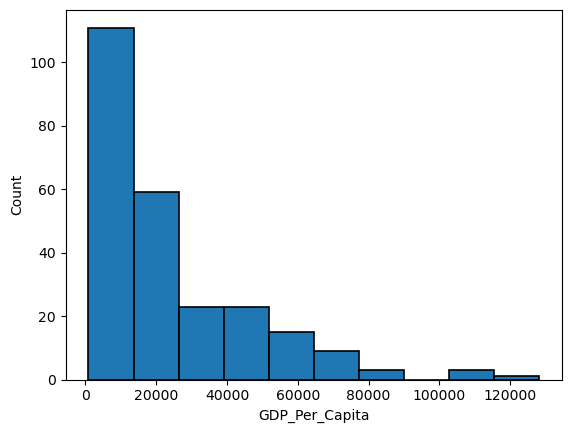

In [241]:
#Create a histogram
plt.hist(gdp_distribution, edgecolor='black', linewidth=1.2)
plt.xlabel("GDP_Per_Capita")
plt.ylabel("Count")

Text(0.5, 0, 'GDP_Per_Capita')

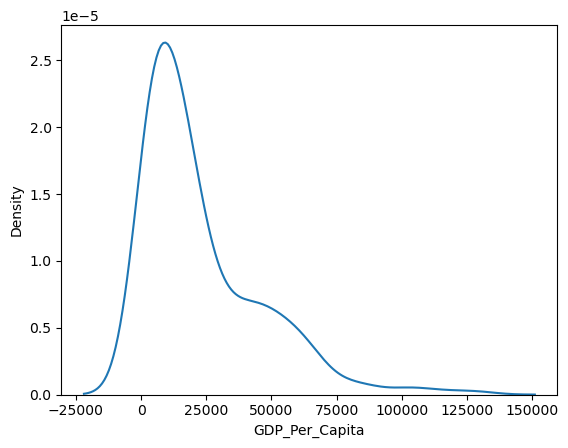

In [243]:
# density plot
sns.kdeplot(gdp_distribution)
plt.xlabel("GDP_Per_Capita")

<Axes: xlabel='GDP_Per_Capita'>

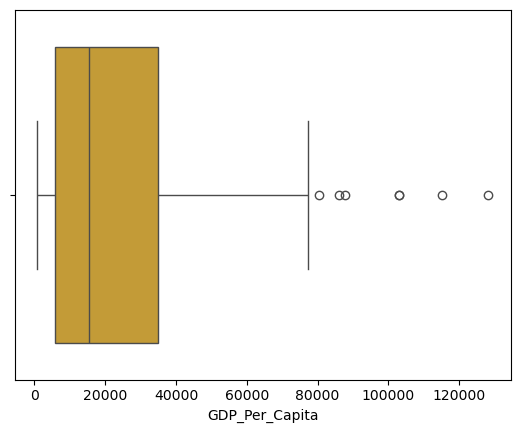

In [245]:
# a boxplot
sns.boxplot( gdp_distribution, orient="h", color="goldenrod")

<Axes: xlabel='GDP_Per_Capita'>

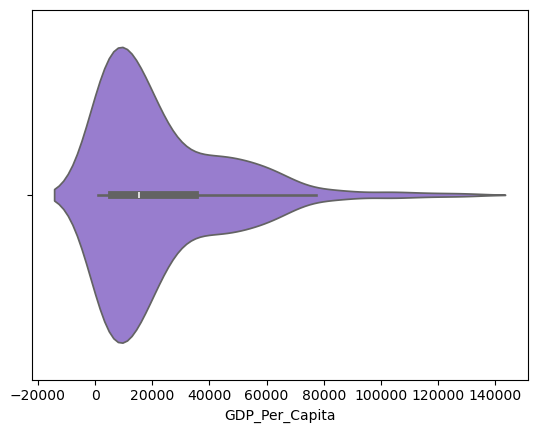

In [247]:
# a violin plot
sns.violinplot(gdp_distribution,orient="h", color="mediumpurple")

In [249]:
# 9. What was the median GDP per capita value in 2020?
gdp_distribution.median()

15309.23598817024

In [287]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [295]:
# 10. compare GDP per capita values for the years 1990, 2000, 2010, and 2020. 
# Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades.
# rows_selected = (gdp_df["Year"] == 1990) | (gdp_df["Year"] == 2000) | (gdp_df["Year"] == 2000 ) | (gdp_df["Year"] == 2000)
rows_selected = gdp_df["Year"].isin([ 1990, 2000, 2010, 2020])
gdp_decades = gdp_df[rows_selected]
gdp_decades

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

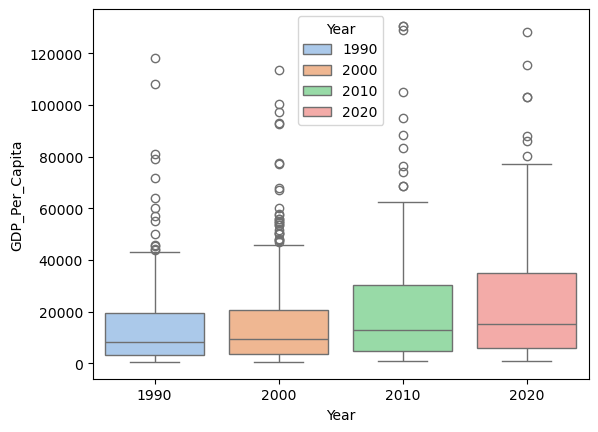

In [343]:
# A boxplot
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], hue=gdp_decades["Year"], palette="pastel")    

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

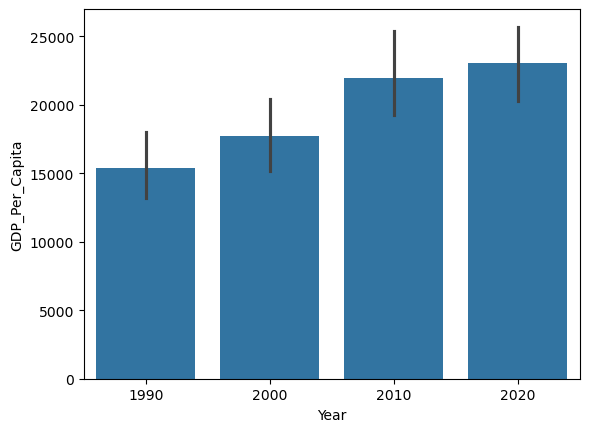

In [369]:
# A barplot
sns.barplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

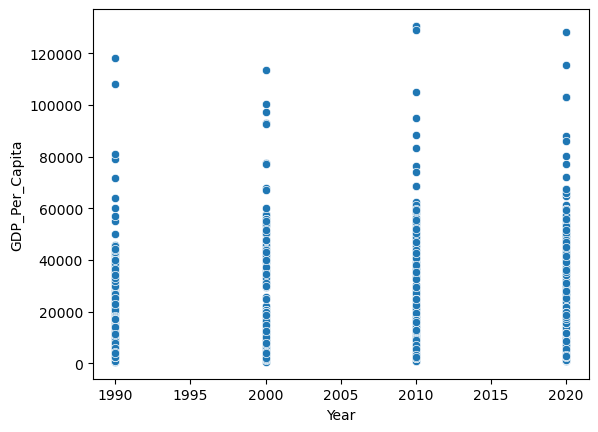

In [371]:
#A scatterplot
sns.scatterplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

In [ ]:
#A scatterplot with a trend line overlaid 

In [363]:
# 11. Which country was the first to have a GDP per capita greater than $100,000?
gdp_df[gdp_df["GDP_Per_Capita"] > 100000].sort_values(by="Year").head(1)

,Country,Year,GDP_Per_Capita
7827,United Arab Emirates,1990,108057.042464


In [ ]:
# 12. Which country had the highest GDP per capita in 2020?
# Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset

In [253]:

# 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?
# 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.
# 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.
# 16. Look at the number of observations in this dataset per year. What do you notice?
# 17. What is the first year to have a non-zero internet users percentage value?
# 18. How does the distribution of internet users percent differ for 2000 and 2014?
# 19. For how many countries was the percentage of internet users below 5% in 2014?
# 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.
# 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?
# 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.
# 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.
# 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".
# 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

# ### Bonus exercise:
# 1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.
